In [1]:
import numpy as np
import matplotlib.pyplot as plt
fig_size = (10,10)


Text(0.5, 1.0, 'noisy data')

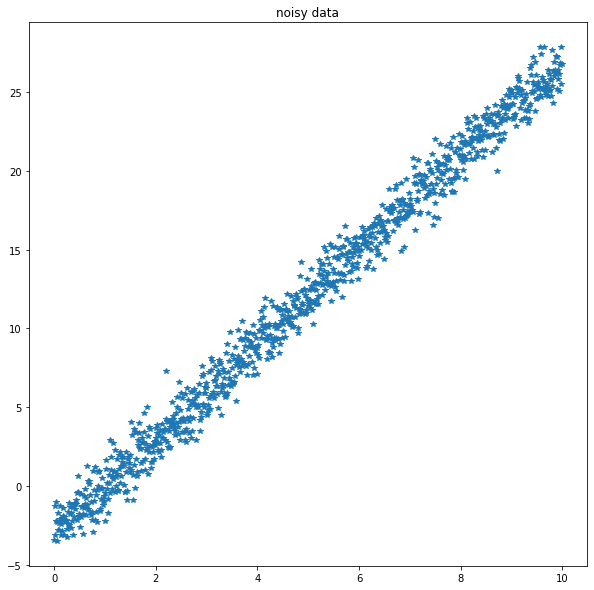

In [2]:
x_max = 10
x_step = 0.01
x = np.arange(0, x_max, x_step)
y = 3*x-3

# add noise to data
std = 1
y = y+np.random.normal(scale=std, size=x.shape)

plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
plt.title("noisy data")



In [3]:
# calc LS matrices
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
print(X.shape)
y_vec = y.reshape(-1, 1)



(1000, 2)


[[ 2.99174943]
 [-2.94762867]]


Text(0.5, 1.0, 'noisy data + best LS fit. $b^T$=[[ 2.99174943 -2.94762867]]')

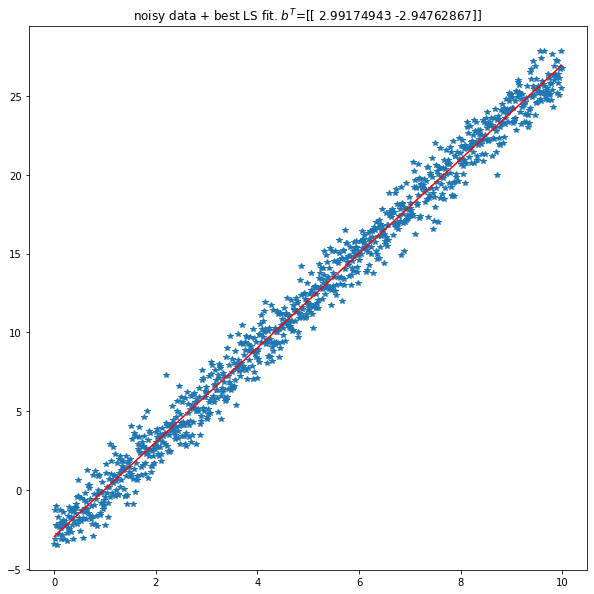

In [4]:
b = np.linalg.inv(X.T@X)@X.T@y_vec
print(b)

# plot fit results
plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
# x_axis = np.arange(x_max+x_step)
plt.plot(x, b[0]*x+b[1], 'r')
plt.title("noisy data + best LS fit. $b^T$="+str(b.T))


In [5]:
b_np = np.linalg.lstsq(X, y_vec, rcond=None)[0]
mse = np.mean((b-b_np)**2)
print(mse)


8.884545945051645e-29


Text(0.5, 1.0, 'noisy vertical data')

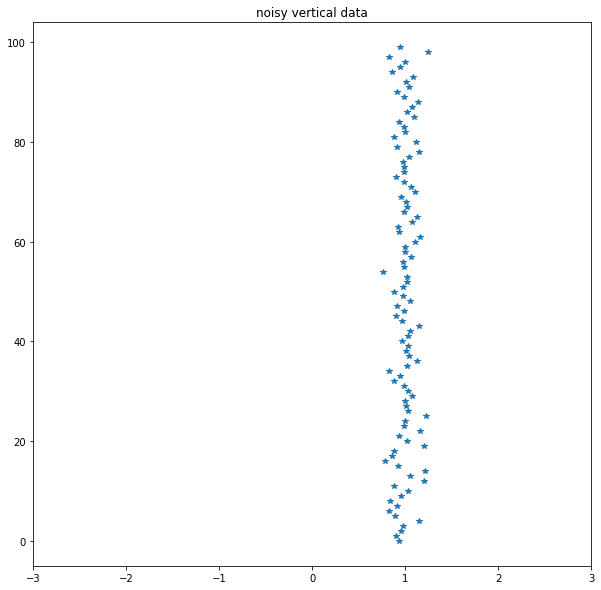

In [6]:
data_sz = 100
x = np.ones(data_sz)
y = np.arange(data_sz)

# add noise to data
std = 0.1
x = x+np.random.normal(scale=std, size=x.shape)

plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
axes = plt.gca()
axes.set_xlim([-3, 3])
plt.title("noisy vertical data")



In [7]:
# calc LS matrices
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
y_vec = y.reshape(-1, 1)



[[27.9214327 ]
 [21.58230127]]


Text(0.5, 1.0, 'vertical data + best LS fit. $b^T$=[[27.9214327  21.58230127]]')

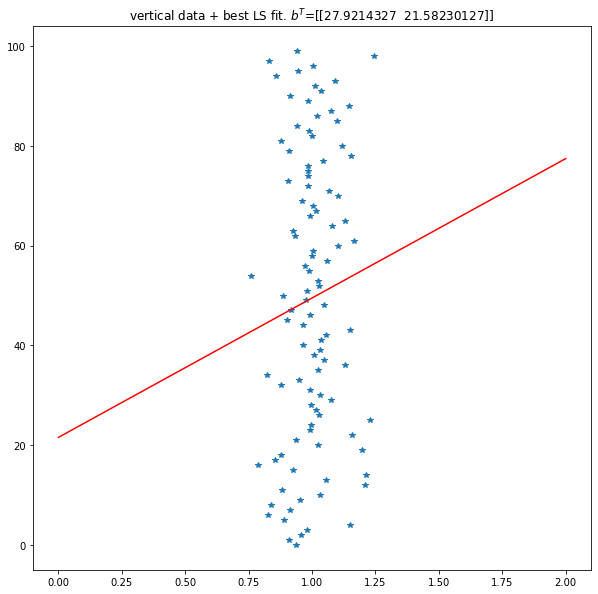

In [8]:
b = np.linalg.inv(X.T@X)@X.T@y_vec
print(b)

# plot fit results
plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
x_axis = np.arange(3)
plt.plot(x_axis, b[0]*x_axis+b[1], 'r')
plt.title("vertical data + best LS fit. $b^T$="+str(b.T))




Text(0.5, 1.0, 'noisy vertical data + linear TLS fit')

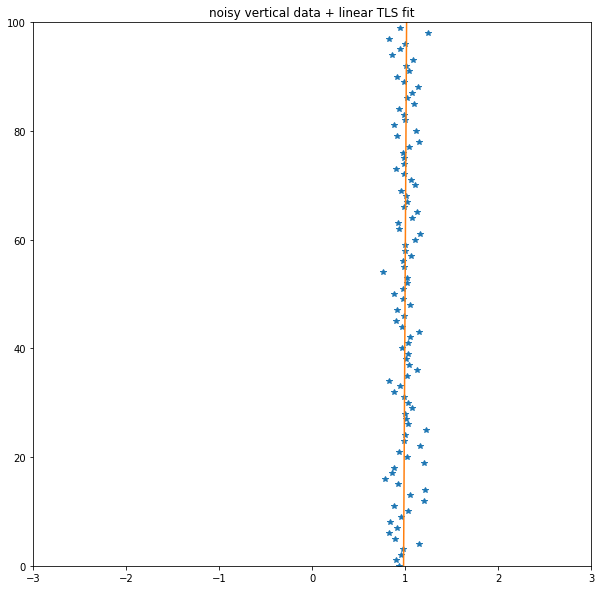

In [9]:

X = np.concatenate((x.reshape(-1, 1)-np.mean(x),
                    y.reshape(-1, 1)-np.mean(y)), axis=1)


def linear_tls(X):
    w, v = np.linalg.eig(X.T@X)
    return v[:, np.argmin(w)]


tls_res = linear_tls(X)

a = tls_res[0]
b = tls_res[1]

c = -a*np.mean(x)-b*np.mean(y)
x_fit = np.array([x.min(), x.max()])
y_fit = -a/b*x_fit-c/b

plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
plt.plot(x_fit, y_fit)
axes = plt.gca()
axes.set_xlim([-3, 3])
axes.set_ylim([0, 100])
plt.title("noisy vertical data + linear TLS fit")



Text(0.5, 1.0, 'noisy parabola data')

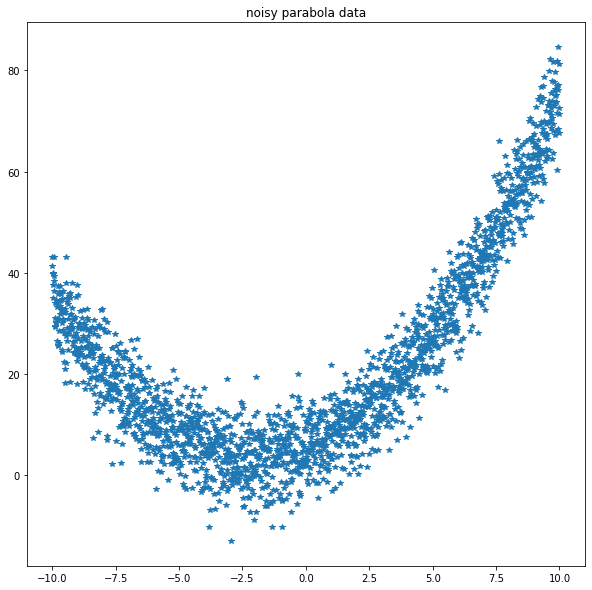

In [10]:
x_step = 0.01
x = np.arange(-10, 10+x_step, x_step)

y = 0.5*x**2+2*x+5

# add noise to data
std = 5
y = y+np.random.normal(scale=std, size=y.shape)

plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
plt.title("noisy parabola data")


In [11]:
# calc LS matrices
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec**2, x_vec, np.ones(x_vec.shape)), axis=1)
y_vec = y.reshape(-1, 1)

b = np.linalg.lstsq(X, y_vec, rcond=None)[0]
print(b)


[[0.49512385]
 [2.00399043]
 [5.22470893]]


Text(0.5, 1.0, 'data + best LS fit. $b^T$=[[0.49512385 2.00399043 5.22470893]]')

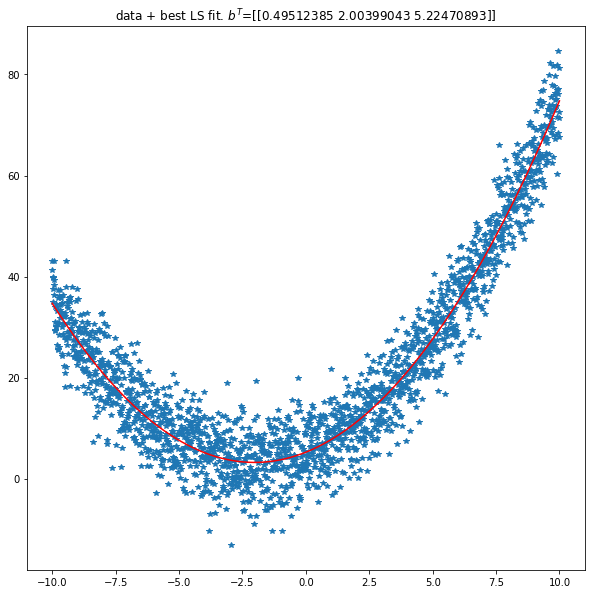

In [12]:
plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
plt.plot(x, b[0]*x**2+b[1]*x+b[2], 'r')
plt.title("data + best LS fit. $b^T$="+str(b.T))



Text(0.5, 1.0, 'data with outlier')

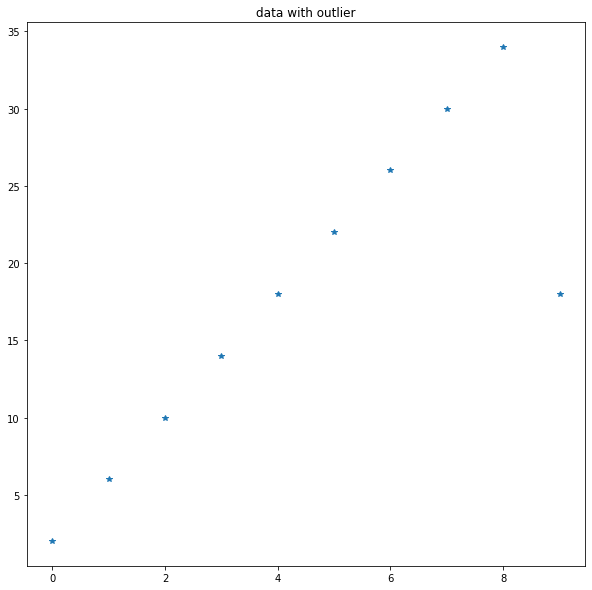

In [13]:
x_max = 10

x = np.arange(10)
y = 4*x+2

# let's change the last data point
y[-1] -= 20

plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
plt.title("data with outlier")




In [14]:
# calc LS matrices
x_vec = x.reshape(-1, 1)
X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
y_vec = y.reshape(-1, 1)



[[2.90909091]
 [4.90909091]]


Text(0.5, 1.0, 'data with outlier + best LS fit. $b^T$=[[2.90909091 4.90909091]]')

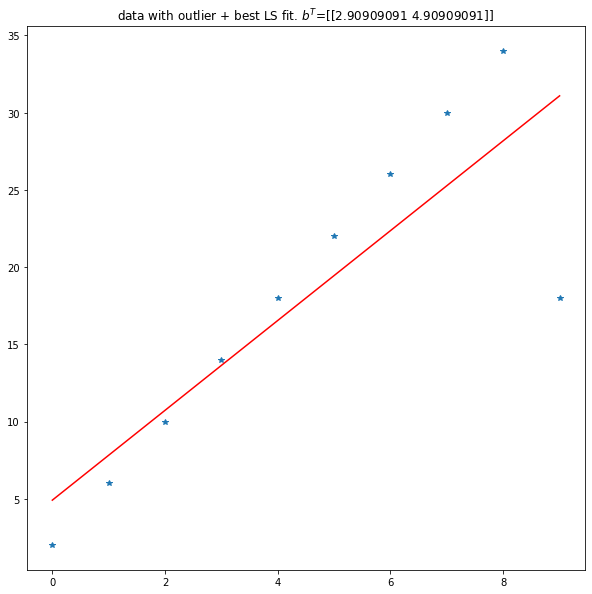

In [15]:
b = np.linalg.inv(X.T@X)@X.T@y_vec
print(b)

# plot fit results
plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
x_axis = np.arange(x_max)
plt.plot(x_axis, b[0]*x_axis+b[1], 'r')
plt.title("data with outlier + best LS fit. $b^T$="+str(b.T))



## RANSAC
### arrange data


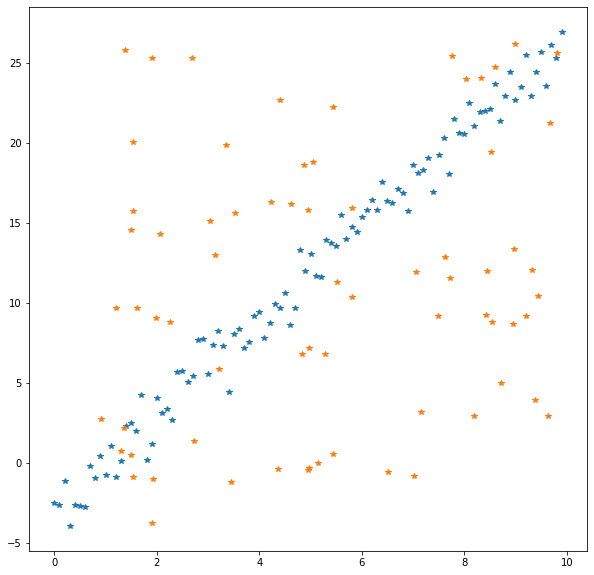

In [16]:

x = np.arange(0, 10, 0.1)
y = 3*x-3

# add noise to data
std = 1
y = y+np.random.normal(scale=std, size=x.shape)

# add random noise unrelated to noisy line
x_noise = np.random.uniform(x.min(), x.max(), size=70)
y_noise = np.random.uniform(y.min(), y.max(), size=70)

plt.figure(figsize=fig_size)
plt.plot(x, y, '*')
plt.plot(x_noise, y_noise, '*')



In [17]:
x = np.concatenate((x, x_noise))
y = np.concatenate((y, y_noise))



### run naive RANSAC


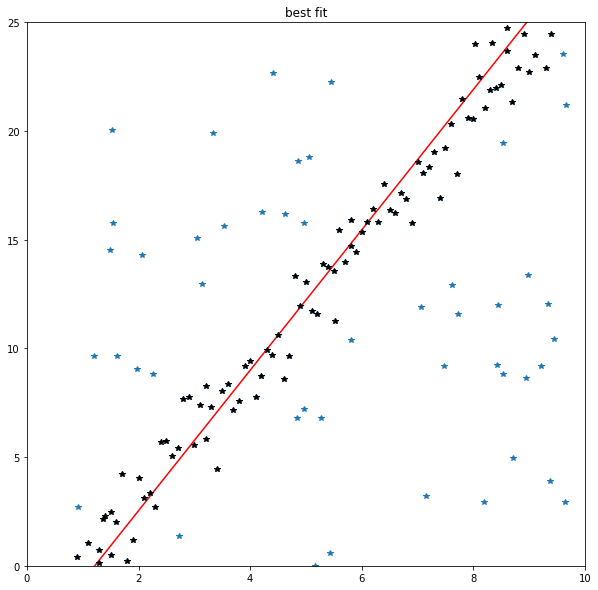

In [18]:
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# from matplotlib.figure import Figure

# fig = Figure(dpi=500)
# canvas = FigureCanvas(fig)

TH = 1
best_inliers = np.array([])
best_b = None

inliers_inds_list = []
for i in range(10):

    #====== choose 2 random inds
    rand_indices = np.random.choice(x.shape[0], size=2)

    #====== build LS data:
    x_vec = x[rand_indices].reshape(-1, 1)
    X = np.concatenate((x_vec, np.ones(x_vec.shape)), axis=1)
    y_vec = y[rand_indices].reshape(-1, 1)

    b = np.linalg.lstsq(X, y_vec, rcond=None)[0].flatten()

    #====== build fitted line
    line_p1 = np.array([x.min(), b[0]*x.min()+b[1]])
    line_p2 = np.array([x.max(), b[0]*x.max()+b[1]])
    inlier_ind = []
    
    #====== distance of fit line from each sample to determine inliers
    for j in range(x.shape[0]):
        p_j = np.array([x[j], y[j]])

        d_j = np.linalg.norm(np.cross(line_p2-line_p1, line_p1-p_j))/np.linalg.norm(line_p2-line_p1)
        if d_j <= TH:
            inlier_ind.append(j)

    inlier_ind = np.array(inlier_ind)
    inliers_inds_list.append(inlier_ind)

    #====== save best model
    if best_inliers.shape[0] < inlier_ind.shape[0]:
        best_inliers = inlier_ind
        best_b = b
    
    #====== plotting
    # ax = fig.gca()
    # ax.clear()
    # x_axis = np.arange(11)
    # ax.plot(x_axis, b[0]*x_axis+b[1], 'r')
    # ax.plot(x, y, '*')
    # ax.plot(x[inlier_ind], y[inlier_ind], '*k')
    # ax.set_xlim([0, 10])
    # ax.set_ylim([0, 25])
    # # save data for later 
    # canvas.draw()       # draw the canvas, cache the renderer
    # s, (width, height) = canvas.print_to_buffer()
    # X = np.frombuffer(s, np.uint8).reshape((height, width, 4))
    # ransac_process.append(X)



# plot best fit
plt.figure(figsize=fig_size)
ax = plt.gca()
x_axis = np.arange(11)
ax.plot(x_axis, best_b[0]*x_axis+best_b[1], 'r')
ax.plot(x, y, '*')
ax.plot(x[best_inliers], y[best_inliers], '*k')
ax.set_xlim([0, 10])
ax.set_ylim([0, 25])
plt.title("best fit")
plt.show()


### let's see the process in depth


In [19]:
# import ipywidgets as widgets

# slider_out = widgets.IntSlider(
#     description='frame num',
#     value=0, # initial running value
#     min=0,
#     max=len(ransac_process)-1,
#     step=1,
#     continuous_update=False # False -> update only after user finished sliding
#     ) 

# def fig_update_func(frame_num):
#     plt.figure(figsize=fig_size) # figure MUST be defined inside update func
#     plt.imshow(ransac_process[frame_num])
#     plt.title("frame num "+str(frame_num))
#     plt.show()
    
# out = widgets.interactive_output(fig_update_func, {'frame_num': slider_out})

# widgets.HBox([slider_out, out])
